<h1>Loading data</h1>

Required libraries

In [1]:
import pandas as pd
from statsmodels import robust

Load spreadsheet containing 2021 Ontario Sunshine List.

In [2]:
df = pd.read_csv('2021_sunshine.csv')
df.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
0,Colleges,Aarts,Cheri,115618.46,74.25,Fanshawe College Of Applied Arts and Technology,Professor,2021,0
1,Colleges,Aaslepp,Drew,114506.79,124.66,Humber College Institute Of Technology and Adv...,Professor,2021,1
2,Colleges,Abba,Corinne,106770.74,124.45,George Brown College Of Applied Arts and Techn...,Librarian,2021,2
3,Colleges,Abbott,Brian,107378.44,124.61,Conestoga College Institute Of Technology and ...,Professor,2021,3
4,Colleges,Abbott,Kathleen,162873.26,428.40,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2021,4


244,390 candidates in data set.

In [3]:
df.shape

(244390, 9)

Data already clean: free of missing values in all columns.

In [4]:
df.isna().sum()

Sector        0
Last Name     0
First Name    0
Salary        0
Benefits      0
Employer      0
Job Title     0
Year          0
_docID        0
dtype: int64

<h1>Examining Salary</h1>

Distribution of salary values: **long right-tail with majority of salaries under $200,000.** Use of medians may be advised over means as averages of central tendency.

<AxesSubplot:title={'center':'Distribution of Salary Values in the 2021 Ontario Sunshine List'}, ylabel='Frequency'>

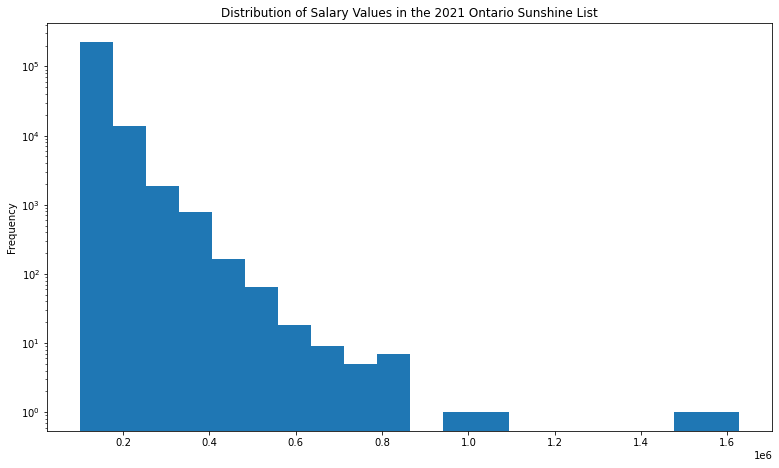

In [6]:
df['Salary'].plot.hist(
    bins=20,
    logy=True,
    title='Distribution of Salary Values in the 2021 Ontario Sunshine List',
    xlabel='Salary Value in Millions of Canadian Dollars',
    figsize=(13,7.5))

<h1>Examining Sectors</h1>

**Sectors with the largest number of candidates**

Smallest sectors, those with less than 500 list candidates, removed for clarity of figure. More than three-quarters of the employees listed were found in **education (schools, universities, and colleges), municipalities, and health.**

<AxesSubplot:title={'center':'Proportion of 2021 Ontario Sunshine List Candidates by Sector'}, ylabel='Sector'>

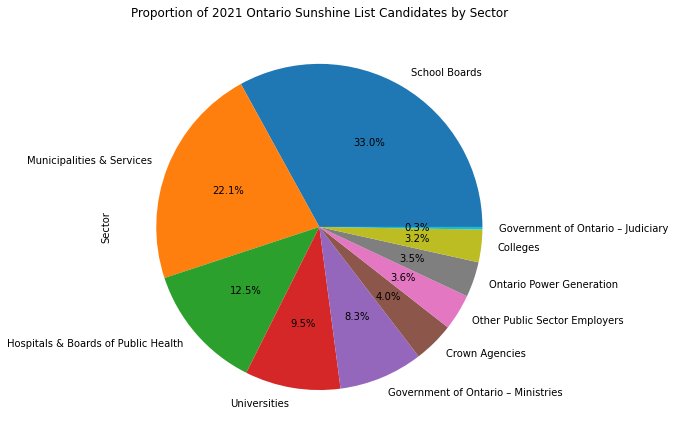

In [7]:
sectors = df['Sector'].value_counts()

sectors[sectors > 500].plot.pie(
    autopct='%1.1f%%',
    startangle=0,
    title='Proportion of 2021 Ontario Sunshine List Candidates by Sector', 
    figsize=(13,7.5))

Sectors not included in the pie chart above were legislative employees and those on secondments.

In [8]:
sectors[sectors < 500]

Government of Ontario – Legislative Assembly and Offices    424
Seconded (Education)                                        100
Seconded (Solicitor General)                                 28
Seconded (Children, Community and Social Services)            6
Seconded (Health)                                             5
Seconded (Attorney General)                                   2
Seconded (Cabinet Office)                                     1
Name: Sector, dtype: int64

**Sectors by highest median salary**

Aside from the single secondment to a Cabinet Office, sectors with the **top 5 highest pay on average were the judiciary, universities, Ontario Power Generation, health, and the legislature.** Note how the median absolute deviations (MADs, a measure of spread for the median) increase with average pay, suggesting more unequal distributions due to more varied payscales.

<AxesSubplot:title={'center':'2021 Ontario Sunshine List Sectors by Median Salary'}, xlabel='Sector'>

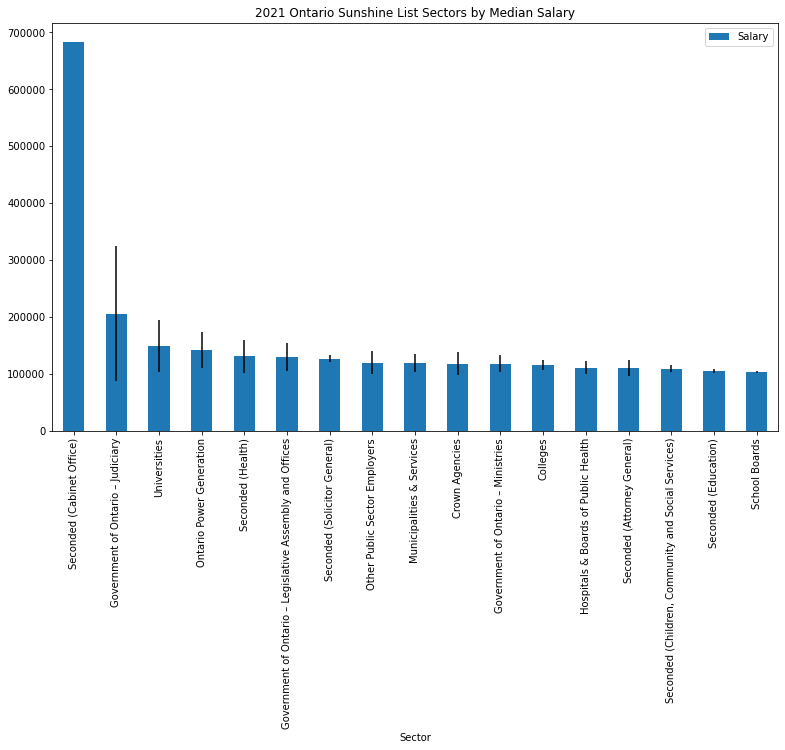

In [9]:
smed = df.groupby('Sector', as_index=False)['Salary'].median()
smed.sort_values(by='Salary', ascending=False, inplace=True)

serr = df.groupby('Sector')['Salary'].apply(robust.mad)

smed.plot.bar(
    'Sector', 
    'Salary', 
    yerr = serr,
    title='2021 Ontario Sunshine List Sectors by Median Salary',
    figsize=(13,7.5))

<h1>Examining Job Titles</h1>

38,401 distinct job titles found in the list.

In [10]:
len(df['Job Title'].unique())

38401

**Titles with the most candidates**

Job titles with the most list candidates were **teachers, nurses, professors, police, and firefighters.** This echoes the earlier finding that the largest represented sectors were education, health, and municipalities.

<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Titles by Count'}>

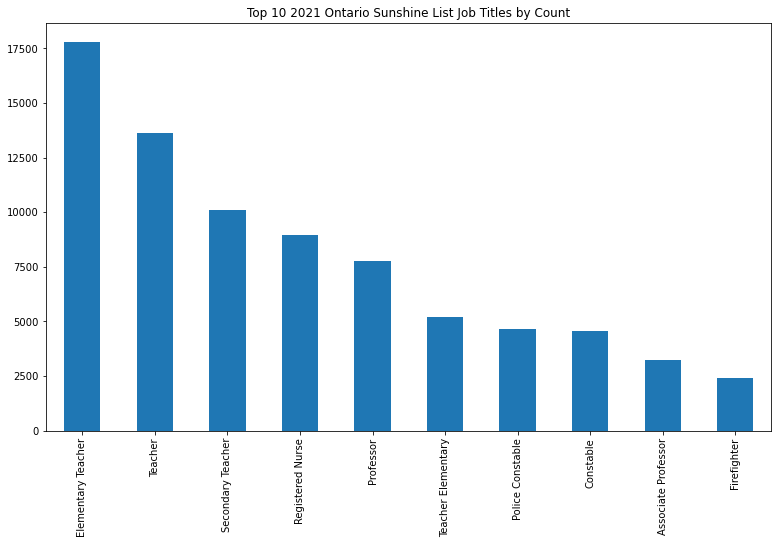

In [11]:
mosttitles = df['Job Title'].value_counts().head(10)

mosttitles.plot.bar(
    title='Top 10 2021 Ontario Sunshine List Job Titles by Count',
    figsize=(13,7.5))

**Specializations with the highest average pay**

"Specialization" is used here to refer to positions with more than 10 list candidates. This cutoff was chosen to exclude top leadership positions such as presidents and executives in favor of technical professions.

<ipython-input-19-0a5882a5447a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moretitles = df.groupby('Job Title')['Job Title', 'Salary']\


<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Titles by Salary'}, xlabel='Job Title'>

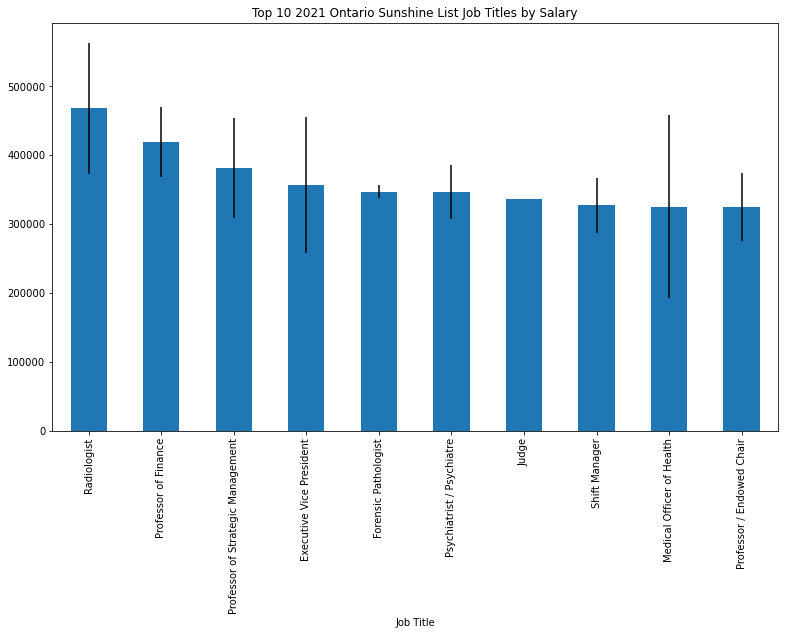

In [19]:
#Filter out rows that have job titles which are under the candidate number threshold
moretitles = df.groupby('Job Title')['Job Title', 'Salary']\
    .filter(lambda x: len(x) > 10)

#Calculate medians and MADs for top 10 highest-paying titles
toptitles = moretitles.groupby('Job Title')['Salary']\
    .median().sort_values(ascending=False).head(10)

terr = moretitles.groupby('Job Title')['Salary'].apply(robust.mad)

toptitles.plot.bar(
    yerr=terr,
    title='Top 10 2021 Ontario Sunshine List Job Titles by Salary',
    figsize=(13,7.5))

<h1>Testing cells</h1>

In [12]:
moretitles = df.groupby('Job Title')['Job Title', 'Salary'].filter(lambda x: len(x) > 10)
moretitles.head()

<ipython-input-12-6d81025329e0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moretitles = df.groupby('Job Title')['Job Title', 'Salary'].filter(lambda x: len(x) > 10)


,Job Title,Salary
0,Professor,115618.46
1,Professor,114506.79
2,Librarian,106770.74
3,Professor,107378.44
5,Professor,123730.17


In [18]:
moretitles.groupby('Job Title')['Salary']\
    .apply(robust.mad).sort_values(ascending=True)\
    .head(10)

Job Title
Teacher – Special Units Itinerant – Autism Spectrum Disorder    0.0
Economic Specialist                                             0.0
Enseignante secondaire                                          0.0
Enseignante élémentaire                                         0.0
Enseignement réussite                                           0.0
Business Consultant                                             0.0
Teacher – French Immersion                                      0.0
Teacher – French Core                                           0.0
Enseignement secondaire                                         0.0
Teacher – Family Studies                                        0.0
Name: Salary, dtype: float64